# overfitting underfitting
bad property of model => awful

overfitting: regression當例子:
你想要找到一個function 通過所有的側資點 你可以使用n次多項式來通過全部n個點得到0誤差 但是這很無用 他只適合training data 卻不見得可以完美符合 testing data =>無法用於predict(正確率差)
解決:增加data/減少degree

underfitting:你連在training data正確率都很低:(
解決:



In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_dots=20
x=np.linspace(0,1,n_dots)  #在0~1中生成20個點
y=np.sqrt(x)+0.2*np.random.rand(n_dots)-0.1

In [6]:
def plot_polynomial_fit(x,y,order):
    p = np.poly1d(np.polyfit(x,y,order))
    t=np.linspace(0,1,200)
    plt.plot(x,y,'ro',t,p(t),'-',t,np.sqrt(t),'r--')
    return p

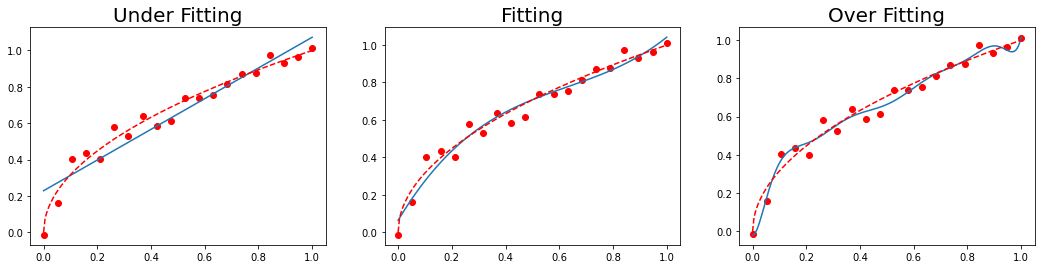

In [7]:
plt.figure(figsize=(18,4))
titles=['Under Fitting','Fitting','Over Fitting']
models=[None,None,None]
for index, order in enumerate([1,3,10]):
    plt.subplot(1,3,index+1)
    models[index]=plot_polynomial_fit(x,y,order)
    plt.title(titles[index],fontsize=20)


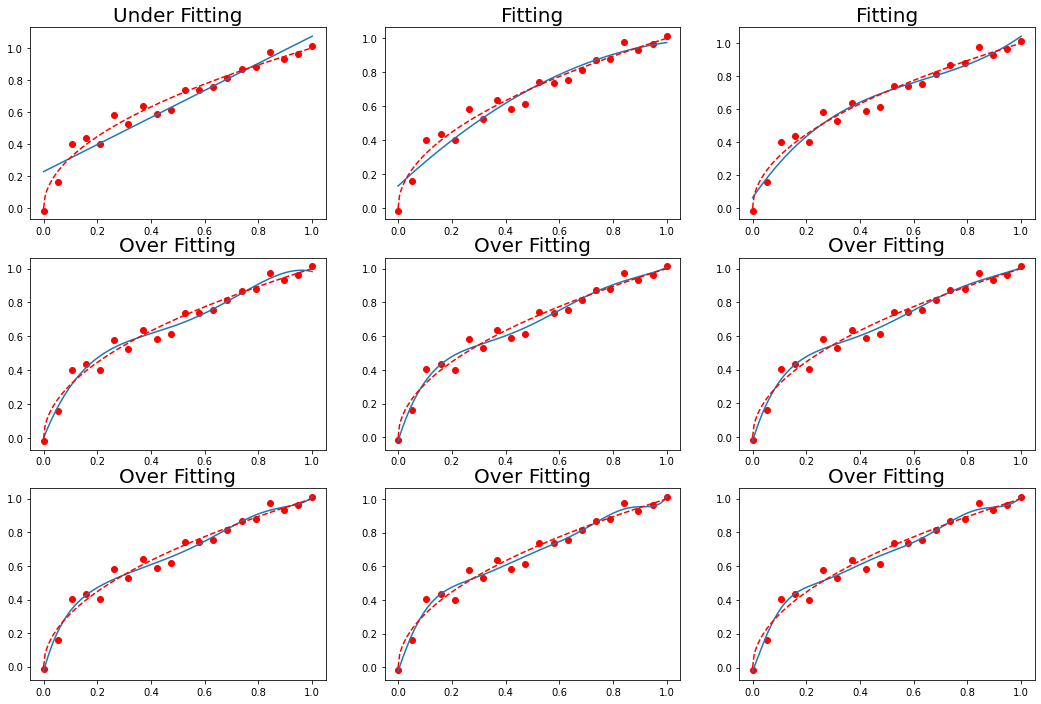

In [9]:
plt.figure(figsize=(18,12))
titles=['Under Fitting','Fitting','Over Fitting']
index=0
models=[None,None,None,None,None,None,None,None,None]
for i in range(1,10):
    plt.subplot(3,3,i)
    models[index]=plot_polynomial_fit(x,y,i)
    plt.title(titles[index],fontsize=20)
    if i==1 or i==3:index+=1

# knn (the k nearest neighbor)
efficiency不太好 但很好懂
他是一種classifier
根據最接近的k個neighbor 他們比較多是哪類 預測值就屬於哪類
只需要一個parameter: k
但你要決定用多少k
不同的k會有不同的decision boundary

大k 比方說k==n:underfitting
因為不管是誰predict值都是眾數

小k 比方說k=1:overfitting
他會過度sensitive to noise(切分會很破碎)

advantage:
high accuracy robust to noise
只適合小樣本
假設你有百萬個data point
你需要算全部整個百萬個距離=>計算負擔大

ordinary kNN 找最近的那一群 他們中最大宗是誰
weighted kNN 距離比較近的應該會比較有可能吧(所以權重較重)
circular kNN 使用半徑r而非k 找出方圓多少內的鄰居都是些誰(適用於很近的鄰居數很多)



In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [32]:
from sklearn.datasets import make_blobs
centers=[[-2,2],[2,2],[0,4]] #你感興趣的center
X,y=make_blobs(n_samples=60,centers=centers,random_state=0,cluster_std=0.6)
#隨機資料

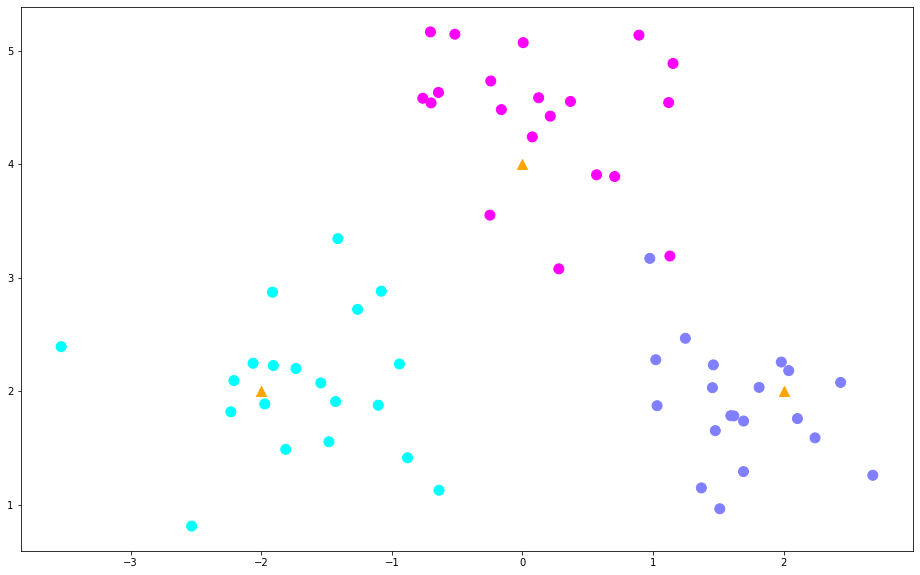

In [33]:
plt.figure(figsize=(16,10))
c=np.array(centers)
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='cool')
plt.scatter(c[:,0],c[:,1],s=100,marker='^',c='orange')

In [34]:
from sklearn.neighbors import KNeighborsClassifier
k=5
clf=KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

KNeighborsClassifier()

In [35]:
X_sample=[0,2]
X_sample=np.array(X_sample).reshape(1,-1)
y_sample=clf.predict(X_sample)
neighbors=clf.kneighbors(X_sample,return_distance=False)

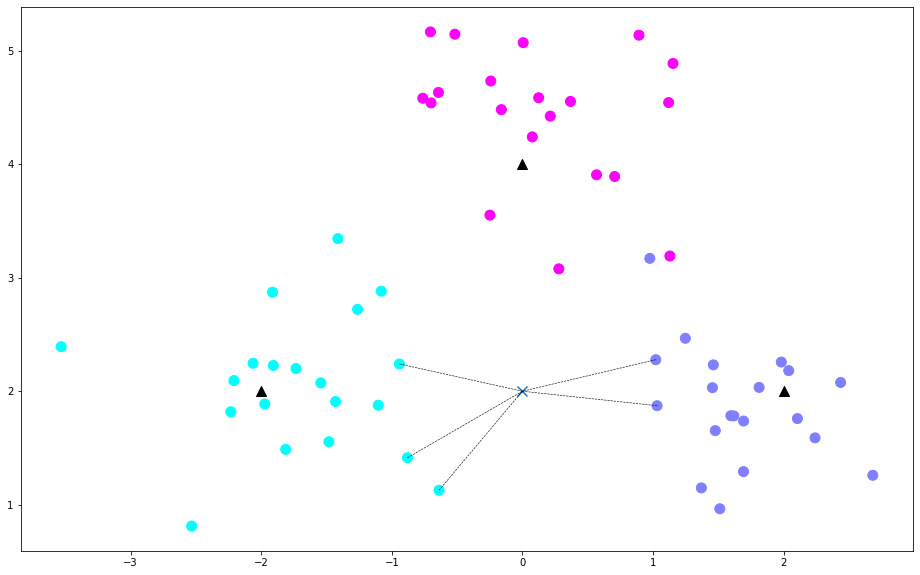

In [36]:
plt.figure(figsize=(16,10))
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='cool')
plt.scatter(c[:,0],c[:,1],s=100,marker='^',c='k')
plt.scatter(X_sample[0][0],X_sample[0][1],marker='x',s=100,cmap='cool')
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]],'k--',linewidth=0.6)

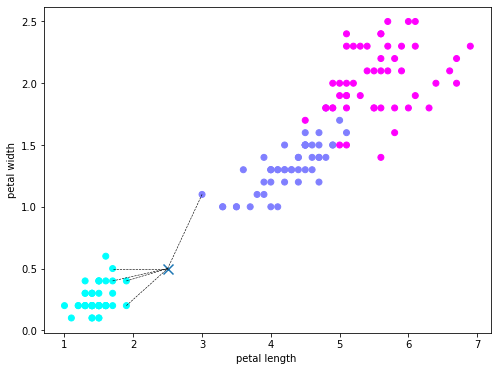

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets #內建資料集
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.xlabel('petal length ')
plt.ylabel('petal width')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cool')

k=5
clf=KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

X_sample=[2.5,0.5]
X_sample=np.array(X_sample).reshape(1,-1)
y_sample=clf.predict(X_sample)
neighbors=clf.kneighbors(X_sample,return_distance=False)

plt.scatter(X_sample[0][0],X_sample[0][1],marker='x',s=100,cmap='cool')
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]],'k--',linewidth=0.6)

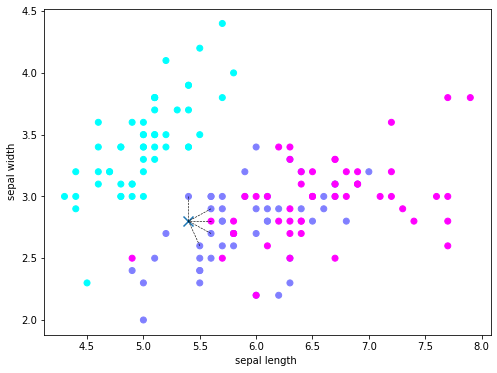

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets #內建資料集
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X = iris.data[:, 0:2]
y = iris.target


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.xlabel('sepal length ')
plt.ylabel('sepal width')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cool')

k=5
clf=KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

X_sample=[5.4,2.8]
X_sample=np.array(X_sample).reshape(1,-1)
y_sample=clf.predict(X_sample)
neighbors=clf.kneighbors(X_sample,return_distance=False)

plt.scatter(X_sample[0][0],X_sample[0][1],marker='x',s=100,cmap='cool')
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]],'k--',linewidth=0.6)

# kNN regression
看x最近得neighbor是誰 他的縱座標就是target的

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [73]:
n_dots=40
X=5*np.random.rand(n_dots,1)
y=np.cos(X).ravel()
y+=0.2*np.random.rand(n_dots)-0.1

In [74]:
from sklearn.neighbors import KNeighborsRegressor
k=5
knn=KNeighborsRegressor(k)
knn.fit(X,y)

KNeighborsRegressor()

In [75]:
T=np.linspace(0,5,500)[:,np.newaxis]
y_pred=knn.predict(T)
knn.score(X,y)

0.9740634144269714

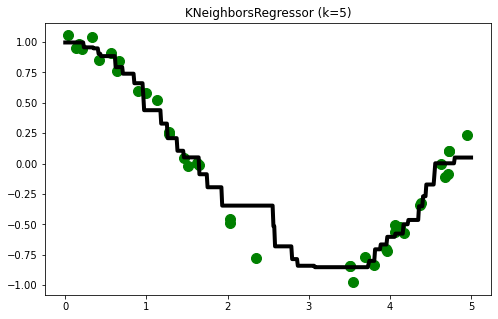

In [76]:
plt.figure(figsize=(8,5))
plt.scatter(X,y,c='g',s=100,label='data')
plt.plot(T,y_pred,c='k',lw=4,label='prediction')
plt.axis('tight')
plt.title("KNeighborsRegressor (k=%i)"%k)
plt.show()

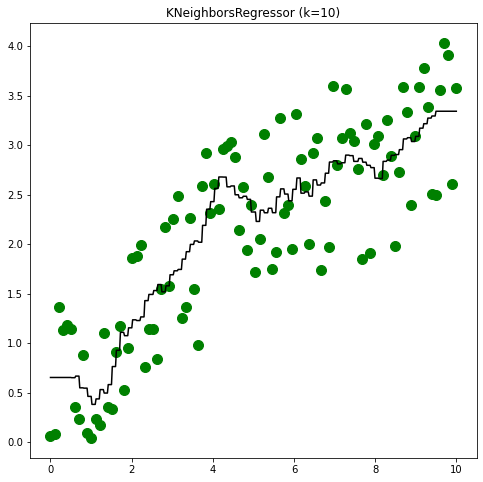

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.neighbors import KNeighborsRegressor
n_dots=100
X=np.linspace(0,10,n_dots)  
y=np.sqrt(X)
for i in range(n_dots):
    y[i]+=random.uniform(-1, 1)
X=X.reshape(-1,1)
y=y.reshape(-1,1)

k=10
knn=KNeighborsRegressor(k)
knn.fit(X,y)
T=np.linspace(0,10,500)[:,np.newaxis]
y_pred=knn.predict(T)
knn.score(X,y)
plt.figure(figsize=(8,8))
plt.scatter(X,y,c='g',s=100,label='data')
plt.plot(T,y_pred,c='k',label='prediction')
plt.axis('tight')
plt.title("KNeighborsRegressor (k=%i)"%k)
plt.show()

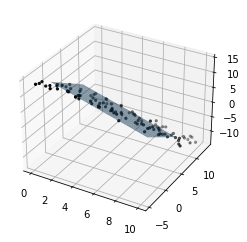

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn.linear_model

n_dots=100
XY= np.linspace((0,0),(10,10),n_dots)
for i in range(n_dots):
    XY[i,1]+=random.uniform(-5, 5)
z=10-XY[:,0]-XY[:,1]
for i in range(n_dots):
    z[i]+=random.uniform(-1, 1)
   
model=sklearn.linear_model.LinearRegression()
model.fit(XY,z)
from mpl_toolkits import mplot3d
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(XY[:,0],XY[:,1],z,marker='.',color='black')
coefs=model.coef_
intercept=model.intercept_
xs=np.tile(np.arange(10),(10,1))
ys=np.tile(np.arange(10),(10,1)).T
zs=xs*coefs[0]+ys*coefs[1]+intercept
ax.plot_surface(xs,ys,zs,alpha=0.5)
plt.show()

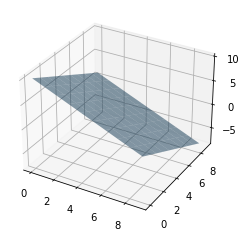

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn.linear_model

n_dots=100
XY= np.linspace((0,0),(10,10),n_dots)
for i in range(n_dots):
    XY[i,1]+=random.uniform(-5, 5)
z=10-XY[:,0]-XY[:,1]
for i in range(n_dots):
    z[i]+=random.uniform(-1, 1)
   
model=sklearn.linear_model.LinearRegression()
model.fit(XY,z)
from mpl_toolkits import mplot3d
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
coefs=model.coef_
intercept=model.intercept_
xs=np.tile(np.arange(10),(10,1))
ys=np.tile(np.arange(10),(10,1)).T
zs=xs*coefs[0]+ys*coefs[1]+intercept
ax.plot_surface(xs,ys,zs,alpha=0.5)
plt.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('d:/diabetes.csv')
print('dataset shape{}'.format(data.shape))
data.head()

dataset shape(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [4]:
X=data.iloc[:,0:8]
Y=data.iloc[:,8]
print('shape of X {}, shape of Y {}'.format(X.shape,Y.shape))

shape of X (768, 8), shape of Y (768,)


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [7]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=2,weights="distance")))
models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=2,radius=500.0)))

In [9]:
results=[]
for name,model in models:
    model.fit(X_train,Y_train)
    results.append((name,model.score(X_test,Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

name: KNN; score: 0.7532467532467533
name: KNN with weights; score: 0.7207792207792207
name: Radius Neighbors; score: 0.7142857142857143


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
data=pd.read_csv('d:/WineQT.csv')
print('dataset shape{}'.format(data.shape))
data.head()

dataset shape(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [12]:
data.groupby('quality').size()

quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64

In [14]:
X=data.iloc[:,0:11]
Y=data.iloc[:,11]
print('shape of X {}, shape of Y {}'.format(X.shape,Y.shape))

shape of X (1143, 11), shape of Y (1143,)


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=2,weights="distance")))
models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=2,radius=500.0)))

In [17]:
results=[]
for name,model in models:
    model.fit(X_train,Y_train)
    results.append((name,model.score(X_test,Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

name: KNN; score: 0.4847161572052402
name: KNN with weights; score: 0.5458515283842795
name: Radius Neighbors; score: 0.45414847161572053
